# COGS 108 - Final Project 

# Overview

This project explores the topic of public restaurant health inspection scores. Interestingly enough, restaurants are given a score from public health departments to ensure that restaurants are following safe food handling procedures. Inspectors are responsible for reporting any food violations restaurants follow; inspectors check for any sources of cross-contamination, unsanitized products, and any products that could harm consumers. However, this project takes a turn and sees the relationship between income and restaurants' health inspection scores. Using a mix of North Carolina's restaurants' inspection results and each zipcode's capita income status, I analyzed the data and created visualizations to see the correlation between the two variables.

# Name & PID

- Name: Joey Dang
- PID: A15980869

# Research Question

Does the overall health score of a restaurant depend on the income level of the location of the restaurant in North Carolina? If so, what is the relationship between the two, capita income and resturant's health score?

## Background and Prior Work

In most states in the United States, restaurants reveal their health scores to the public alphabetical instead of numeric. Note that any type of facilities that provide food to consumers are considered restaurants. Food is a basic necessity, and typically the health score of a restaurant is one of the deciding factors for a consumer's decision to eat at that specific restaurant. Heath scores are measured based on health code violations, which primarily pivot around safety and cleanliness. Moreover, the overall numeric score represents a better reputation for the restaurant's quality than letter grades (Baer). In this case, letter health scores can be quite deceiving; restaurants may encounter some violations against the food safety regulations and still receive good letter health inspection results. Food inspections scores indicate the likelihood risk of food-borne illnesses; the lower the results, the higher the risk. Health scores are calculated into a 100-point scale, with points deducted for each violation. The letter grade is based on the numeric health score with, "90-100 is an A (Sanitation and food safety practices scored appeared to be in the "acceptable to very good" range), 80-89 is a B (sanitation and food safety practices appeared to be in the "marginal to acceptable" range), and 70-79, a C (sanitation and food safety practices appeared to be in the "poor to marginal" range)" (Church).
 
During a routine health inspection, inspectors observe employees and their food preparation practices (Roos). In North Carolina, fifty-four different violations are observed by health inspectors that are worth in a range of 0-4 points. These violations check supervision, employee health, hygiene, protection from contamination, temperature control, chemical leakage, and other important health interventions. In short, food handling issues represent scores in a lower category, while factors that increase the risk of food-borne illness are worth more points (Church). For example, employee's health, potentially hazardous food time/temperature, and protection from contamination are worth more points than other violations. 
 
A few violations that restaurant inspectors check relate to employee's health, safe food and water sources, and also proper temperature control. Moreover, low wages can inevitably lead to restrictions for proper health, good sanitation, limited knowledge, and safe products. Socioeconomic status results in a lack of resources and an inevitable effect on the whole community, people, and businesses (Walker and Hepp). Areas with higher socioeconomic status have a higher advantage over safe food and water access, healthier people, and advanced products. Communities with low socioeconomic status inevitably experience limited access to resources. Potentially, the socioeconomic status of the location of the restaurant can be a factor for an overall lower health score. Although there is no prior work that shows any relationship between income and health score, I plan to investigate using public data to analyze the correlation between the variables, health inspection scores, and average income of the restaurant's location in North Carolina.

References:
- 1) Baer, Stephanie K. What That Restaurant Letter Grade Isn't Telling You about Health and Cleanliness. 30 Aug. 2017,
www.sgvtribune.com/2015/06/25/what-that-restaurant-letter-grade-isnt-telling-you-about-health-and-cleanliness/.
- 2) Roos, Dave. How Restaurant Health Inspections Work. 18 Oct. 2017, 
www.recipes.howstuffworks.com/tools-and-techniques/restaurant-health-inspections.htm.
- 3) Church, Paul. “The ABCs of Restaurant Food Grades.” Tribune, The Courier-Tribune, 30 Aug. 2014,
www.courier-tribune.com/article/20140830/news/308309822.
- 4) Walker, Lorelei, and Nancy Hepp. “Socioeconomic Environment.” Socioeconomic Environment - The Collaborative on Health and the Environment, Oct. 2016, 
www.healthandenvironment.org/environmental-health/environmental-risks/socioeconomic-environment.

# Hypothesis


Based on the research I have done, I hypothesize that the average income of the restaurant's location will factor and correlation among the restaurant's health score. Depending on the location of the restaurants, it will likely result in a higher or lower score in their health scores. It is quite challenging to say if the correlation will be negative or positive, but I predict that the higher the income of the specific area, the higher the restaurant health score. Higher-income is optimal for restaurants with higher health scores, while locations with lower income will have lower health scores.

# Dataset(s)

The dataset we need to answer this question would include the restaurant's address (zip codes), the health score of that specific restaurant in North Carolina, and the median income of the zip code area. We need an ample set of observations, so we do not have any sampling bias, which is the dataset based on the restaurants in North Carolina.

We need enough observations in the dataset to estimate the health score in each zip codes to graph the variables. I prefer to get the dataset of each restaurant available and organize the location of the restaurant based on the zip code. These data will be collected based on the city government itself; there are records of the restaurant inspection dataset on the actual state government's data websites. The datasets we need will have to contain restaurant information, restaurant health ratings, and zipcode's median income. More specifically, the variables used are stated below.

**Variables:**

health score of the restaurant in North Carolina
location (zip code) of each restaurants used
capita income of zipcode area

- Dataset Name: inspections
- Number of observations: 18467

The primary dataset shows a representative sample of all restaurant inspections in North Carolina, which has information about the restaurants, including locations, inspectors, numeric health inspection scores, critical points, and many other fields. However, we will be investing a portion of it shown in the Data Cleaning section.

- Dataset Name: zipcodes
- Number of observations: 39

The second dataset, a representative sample of all zip codes in North Carolina, representing median family income, household income, per capita income, families under the poverty line, and percentage of nonwhite residents.

The dataset, Inspections, contains the location (zip code) of each restaurant in North Carolina; the datasets can be merged based on the zipcodes. Because there are multiple restaurants with the same zip codes, we would have to find the restaurants' average health scores with the same zip codes to find the relationship between the two variables, income, and zip codes.

# Setup

### Library Imports
In our setup process, we start by importing all the necessary Python libraries that contain helpful resources to load, manipulate, clean, and visualize our datasets. These packages contain functions that can help determine and analyze the distributions of our data collection.

In [1]:
# Display plots directly in the notebook
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

### Dataframe Initialization
Next, we load and read all the CSV files to see the data entries and a glance of the dataset. We will read all the data we plan to use in Python as a data frame. We will load the data files, inspections and zip codes, into data frames called **inspections_df** and **zipcodes_df** using pandas.

In [2]:
inspections_df = pd.read_csv('data/inspections.csv')
zipcodes_df = pd.read_csv('datas/zipcodes.csv')

# Data Cleaning

In the process of data cleaning, we start by removing some columns that represent information that deviate from the big question in the two data frames, **inspections_df** and **zipcodes_df**. Potentially, the data cleaning process will do the main components of removing unnecessary irrelevant information and placing data into the correct columns. We will only keep the data we need for our analysis.

### Inspections Dataframe

The first step is to remove any identifying information to keep restaurants anonymous so that they cannot possibly ruin their reputations such as the id number, name, address (excluding zip code), and phone number. We modify the data frame so that inspections_df only contains data that share mainly zip code, health score, and the critical violations.

Next, we would organize the dataset by zipcode and health score.

In [3]:
inspections_df = inspections_df.drop(['date', 'name', 'address1', 'address2', 'state', 'facilitytype', 'inspectedby',
                                      'restaurantopendate', 'days_from_open_date', 'geocodestatus', 'hsisid', 'city',
                                      'second_match', 'num_critical_mean_previous', 'postalcode', 'top_match', 'type',
                                      'y', 'description', 'avg_neighbor_num_non_critical', 'previous_inspection_date',
                                      'x', 'days_since_previous_inspection', 'previous_inspection_by_same_inspector',
                                      'num_non_critical_mean_previous', 'inspection_num', 'num_non_critical_previous',
                                      'avg_neighbor_num_critical', 'phonenumber', 'num_critical_previous', 'critical',
                                      'inspector_id', 'num_non_critical'], axis=1)

inspections_df = inspections_df.sort_values(by=['zip', 'score'])
inspections_df = inspections_df.reset_index(drop=True)

Now, let's take a peek at the top of the inspections dataframe to ensure unnecessary columns are removed.

In [4]:
inspections_df.head()

,zip,score,num_critical
0,27501,92.0,10
1,27501,93.0,8
2,27501,94.0,6
3,27501,94.5,8
4,27501,97.5,2


 ### Zipcodes Dataframe

For the data cleaning process for zipcode_df, we need to remove unnecessary information irrelevant to the hypothesis. We will only keep the data representing the zip code, capita income, and percentage of poverty.

In [5]:
zipcodes_df = zipcodes_df.drop(['median_family_income_dollars', 'percent_snap_benefits', 'percent_nonwhite',
                                'percent_supplemental_security_income', 'median_household_income_dollars' ], axis=1)

#Rename the columns name
zipcodes_df.columns = ["zip", "capita_income", "poverty_rate"]

Although all restaurants are required to have a health inspection, there is a possible chance that there are no restaurants in particular zip codes. We need to take account of this situation and remove the rows with the zipcode that contains no restaurant inspections' results.

In [6]:
unique_zipcodes = inspections_df['zip'].unique()
zipcodes_df = zipcodes_df[zipcodes_df['zip'].isin(unique_zipcodes)]

Now, let's take a peek at the top of the zipcodes dataframe to ensure unnecessary columns are removed.

In [7]:
zipcodes_df.head()

,zip,capita_income,poverty_rate
0,27501,21631,10.5
1,27502,36763,3.4
2,27511,33139,9.6
3,27513,41232,3.8
4,27518,49865,5.5


We need to determine how many unique zip codes we are going to work with to calculate the mean of the health score of the restaurant for each distinct zip code.

In [8]:
len(zipcodes_df)

37

### Combining Datasets
Now, we know that we are working with 37 unique zipcodes in North Carolina. We need to find the average health scores and also average number of critical violations per zip code and add it into the data frame, **zipcode_df**.

Finding the average health scores for each particular zipcode:

In [9]:
def health_score(zipcode):
    scores = []
    for i in range(len(inspections_df)):
        if inspections_df.loc[i, 'zip'] == zipcode:
            scores.append(inspections_df.loc[i, 'score'])
    return np.mean(scores)

Finding the average critical violations for each particular zipcode:

In [10]:
def critical_violations(zipcode):
    critical = []
    for i in range(len(inspections_df)):
        if inspections_df.loc[i, 'zip'] == zipcode:
            critical.append(inspections_df.loc[i, 'num_critical'])
    return np.mean(critical)

Applying the functions that finds the average health score and critical violations into two new columns, **health_score** and **critical_violations**, into zipcode_df.

In [11]:
zipcodes_df["score"] = zipcodes_df['zip'].apply(health_score)
zipcodes_df["critical"] = zipcodes_df['zip'].apply(critical_violations)
zipcodes_df.head()

,zip,capita_income,poverty_rate,score,critical
0,27501,21631,10.5,94.750000,6.000000
1,27502,36763,3.4,96.367223,2.972686
2,27511,33139,9.6,96.418969,2.910381
3,27513,41232,3.8,95.655130,4.368356
4,27518,49865,5.5,97.225291,1.924419


# Data Analysis & Results

We want to determine if there is a relationship between business's health score in North Carolina and the capita income based on the restaurant's zip code.

### Total Number of Resturants per Zip Code
First, we plot the distribution of the number of restaurants in each zip code to understand more about the datasets. The bar plot shows the total number of restaurants in each area zip code. Based on the diagram, we can see that there is a significant variance with the number of restaurants between each zip code. The differences among the number of businesses can be a factor in the average health inspection score in each particular area.

[Text(0, 0.5, 'restaurants'),
 Text(0.5, 0, 'zip code'),
 Text(0.5, 1.0, 'Number of Restaurants per Zip Code')]

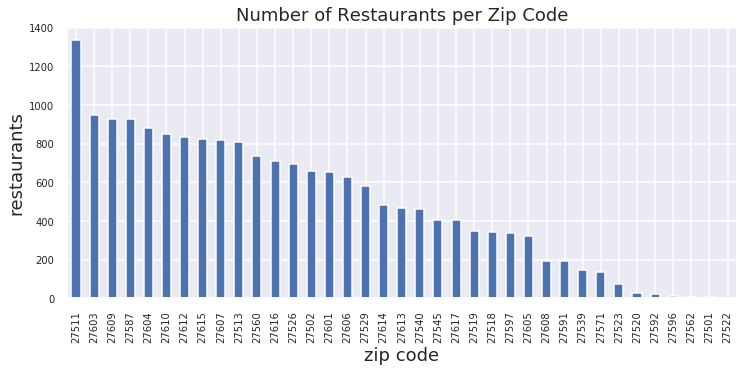

In [12]:
zip_list = [zipcodes for zipcodes in zipcodes_df['zip']]

zip_vc = inspections_df['zip'].value_counts()
ax = zip_vc.loc[zip_vc.index.isin(zip_list)].plot(kind='bar', figsize=(12,5));
plt.tick_params(labelsize=10);
ax.set(xlabel='zip code', ylabel='restaurants', title='Number of Restaurants per Zip Code')

### Distributions of Restaurant's Health Insecption Score per Zip Code
The histogram below represents the average restaurant's health score per zip code. We can see that North Carolina's restaurants mainly have an average health score between 94.5 to 98.5. There is not much of a significant difference between the average rating for each zip code which can potentially be a problem.


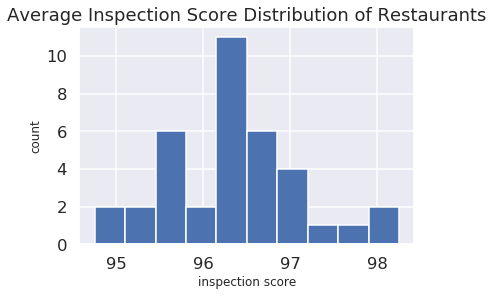

In [13]:
plt.hist(zipcodes_df['score'], bins=10, color='b');
plt.xlabel('inspection score', size=12);
plt.ylabel('count', size=12);
plt.title('Average Inspection Score Distribution of Restaurants');

###  Distributions of Capita Income per Zipcode
The histogram below displays the average capita income per zip code. We can see there is a variance in the income that ranges from 18000 to 60000.

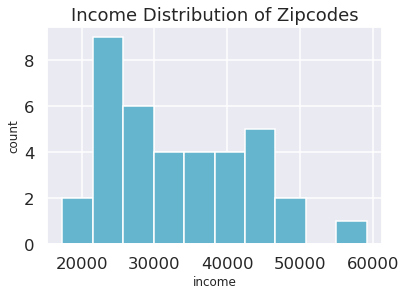

In [14]:
plt.hist(zipcodes_df['capita_income'], bins=10, color='c');
plt.xlabel('income', size=12);
plt.ylabel('count', size=12);
plt.title('Income Distribution of Zipcodes');

### Basic Analyses
Here, we can see the essential descriptive summaries of our data. We can view some exciting statistical data of our data to understand more about the data and ask some interesting questions. Notice that the standard deviation of capita income is vastly large than the standard deviation of the health score.

In [15]:
zipcodes_df.describe()

,zip,capita_income,poverty_rate,score,critical
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,27570.378378,33223.135135,8.089189,96.359787,2.739951
std,41.121332,9989.656623,6.187612,0.779195,1.019619
min,27501.000000,17363.000000,2.000000,94.750000,0.500000
25%,27526.000000,25532.000000,4.100000,95.659091,2.186528
50%,27591.000000,31161.000000,6.000000,96.418969,2.743827
75%,27607.000000,41232.000000,10.400000,96.795620,3.225263
max,27617.000000,59155.000000,35.900000,98.250000,6.000000


### Bivariate (Pearson) Correlation

We can use the preliminary Pearson correlation test to view the correlations among each variable. Below, we can see that there is a small relationship between the two variables, health score and the capita income. The Pearson correlation coefficient (r) for the two variables is -0.137131, which is significantly far from the value, 1. (The closer the absolute value of the Pearson correlation coefficient is to 1, the better the correlation). However, comparing all the other Pearson correlation coefficient, we can see that there is a negative correlation between health score and capita income with a coefficient value of -0.612539.

In [16]:
zipcodes_df.corr(method = "pearson")

,zip,capita_income,poverty_rate,score,critical
zip,1.000000,0.047119,0.284134,-0.027018,-0.233605
capita_income,0.047119,1.000000,-0.612539,-0.005612,0.038387
poverty_rate,0.284134,-0.612539,1.000000,-0.137131,0.011614
score,-0.027018,-0.005612,-0.137131,1.000000,-0.921661
critical,-0.233605,0.038387,0.011614,-0.921661,1.000000


### Health score and Capita Income
We create a linear regression model to predict health scores from capita income by creating an OLS model. From the model, we can view the correlation relationship and the p-value (probability of obtaining test results). Since our p-value is 0.974, significantly higher than 0.5, we must accept that there is not enough evidence to reveal any relationship between the two variables.

In [17]:
income_outcome, income_predictors = patsy.dmatrices('score ~ capita_income', zipcodes_df)
income_mod = sm.OLS(income_outcome, income_predictors)
income_res = income_mod.fit()
print(income_res.summary())

# P-Value: 0.974
# B_0: 96.3743
# B_1: -4.378e-07

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                  0.001103
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.974
Time:                        09:12:36   Log-Likelihood:                -42.762
No. Observations:                  37   AIC:                             89.52
Df Residuals:                      35   BIC:                             92.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        96.3743      0.457    210.940

Using the information from the OLS  model, we can create a visual model, a scatter plot with a best-fit line for the two variables to see the relationship visually. Below, we can see that there is no significant slope. We can conclude that there is a weak correlation (-0.137131) among capita income and the restaurant's health inspection score.

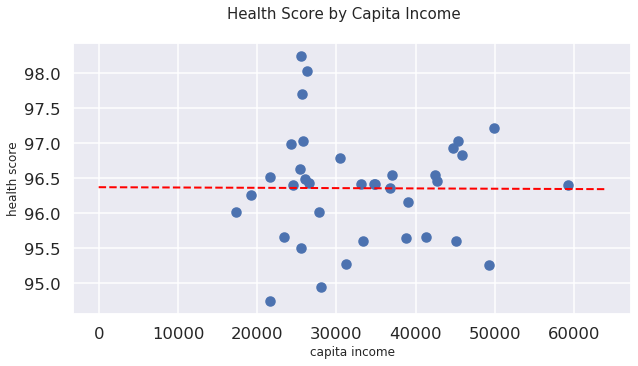

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(zipcodes_df['capita_income'], zipcodes_df['score'])

x = np.arange(1, 64000)
y = -4.378e-07* x + 96.3743
plt.plot(x, y, '--k', color='red', linewidth=2)
plt.xlabel('capita income', size=12)
plt.ylabel('health score', size=12)
plt.suptitle('Health Score by Capita Income', size=15)
plt.show()

### Critical Violations and Capita Income
We create a linear regression model to predict the number of critical violations from capita income by creating an OLS model. From the model, we can view the correlation relationship and the p-value (probability of obtaining test results). Since our p-value is 0.822, significantly higher than 0.5, we must accept that there is not enough evidence to reveal any relationship between the two variables.

In [21]:
violations_outcome, violations_predictors = patsy.dmatrices('critical ~ capita_income', zipcodes_df)
violations_mod = sm.OLS(violations_outcome, violations_predictors)
violations_res = violations_mod.fit()
print(violations_res.summary())

# P-Value: 0.822
# B_0: 2.6098
# B_1: 3.918e-06

                            OLS Regression Results                            
Dep. Variable:               critical   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                   0.05165
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.822
Time:                        09:13:35   Log-Likelihood:                -52.685
No. Observations:                  37   AIC:                             109.4
Df Residuals:                      35   BIC:                             112.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.6098      0.597      4.368

Using the information from the OLS  model, we can create a scatter plot with a best-fit line for the two variables to see the relationship visually. Below, we can see that there is no significant slope. We can conclude that there is a weak correlation (0.038387) among capita income and the number of critical violations of the restaurant.

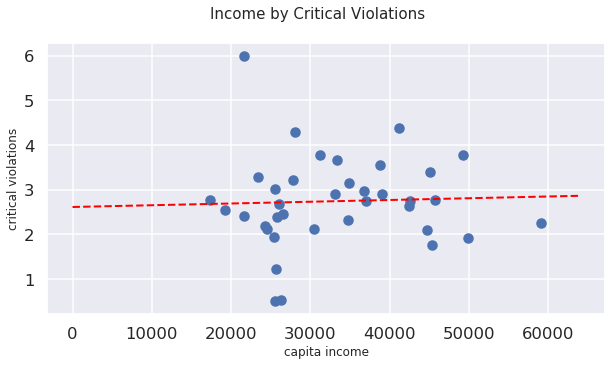

In [22]:
plt.figure(figsize=(10, 5))
plt.scatter(zipcodes_df['capita_income'], zipcodes_df['critical'])

x = np.arange(1, 64000)
y = 3.918e-06 * x + 2.6098
plt.plot(x, y, '--k', color='red', linewidth=2)
plt.xlabel('capita income', size=12)
plt.ylabel('critical violations', size=12)
plt.suptitle('Income by Critical Violations', size=15)
plt.show()

### Health Score and Poverty Rate
We create a linear regression model to predict the health score from the poverty rate by creating an OLS model. From the model, we can view the correlation relationship and the p-value (probability of obtaining test results). Since our p-value is 0.418, less than 0.5, we can accept that there is enough evidence to reveal the relationship between the two variables, a small negative relationship

In [23]:
poverty_outcome, poverty_predictors = patsy.dmatrices('score ~ poverty_rate', zipcodes_df)
poverty_mod = sm.OLS(poverty_outcome, poverty_predictors)
poverty_res = poverty_mod.fit()
print(poverty_res.summary())

# P-Value: 0.418
# B_0: 96.4995
# B_1: -0.0173

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.6708
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.418
Time:                        09:13:48   Log-Likelihood:                -42.411
No. Observations:                  37   AIC:                             88.82
Df Residuals:                      35   BIC:                             92.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       96.4995      0.214    451.649   

Using the information from the OLS  model, we can create a scatter plot with a best-fit line for the two variables to see the relationship visually. Below, we can see that there a slightly descending slope. We can conclude that there is a negative correlation (-0.137131) among the health score of the restaurant and the poverty rate of the area.

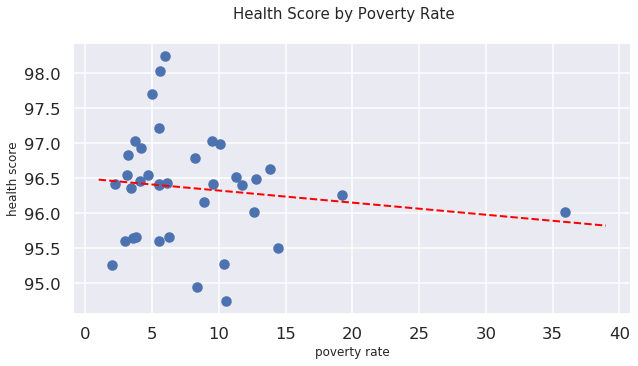

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(zipcodes_df['poverty_rate'], zipcodes_df['score'])

x = np.arange(1, 40)
y = -0.0173 * x + 96.4995
plt.plot(x, y, '--k', color='red', linewidth=2)
plt.xlabel('poverty rate',size=12)
plt.ylabel('health score',size=12)
plt.suptitle('Health Score by Poverty Rate', size=15)
plt.show()

# Ethics & Privacy

When working with data in Data Science, we do our utmost best to ensure that the data we use comes from a trustworthy source, which is both consensual and ethically collected. Sampling bias is a common ethical consideration to think about, and working with data; we always have to consider it a possibility. In our situation, we believe that sampling bias does not take place within our datasets because we will only be using financial and inspection records, which will not allow us to identify any individuals. However, we are provided with many phone numbers, names, and addresses making the data personal to many restaurants. To prevent damage to the restaurant's reputation, we removed specific identification data. The data used to test the hypothesis will not be damaging to anyone because all this is public knowledge and can be easily accessed.

We have taken steps to ensure that the data processed by us is in no way tampered with or affected by our program to ensure that it remains anonymized, unaltered, and unbiased in our report. Preventing data bias is always a task at hand to prevent that we received our datasets from a reliable and credible source; thus, using the public data we obtained will allow others to cross-check our work to ensure that we are not biased.

We hope to do our best in remaining biased and following our ethical obligation to ensure that our analysis report will correctly support my claim, and my results are clear and straightforward. Throughout the project, we have done our best to document our work and do our very best to fulfill our ethical obligations to collect clean and unbiased data and honor the moral and ethical code as it pertains to data science.

# Conclusion & Discussion

This project's primary goal is to indicate a relationship between the restaurant 's health score in North Carolina and its income level.  I predicted that there would be a positive correlation between the variables because money is the main factor for many things and possibly restaurants' health inspection scores. To test my hypothesis, I began cleaning the datasets containing variables I believed I needed. After analysis, I have concluded that there is no significant correlation between health inspection scores and capita income. However, one factor correlated with the health score, the poverty rate, but the correlation coefficient is quite small.

I personally thought capita income would make a difference in health score because I expected the quality of a restaurant to be the same status as their location. Surprisingly enough, the poverty rate did have a small correlation to the restaurant's health score.

During this whole process of this project, I felt like there was a vast time restriction. If I had a more extended period to do this project, especially with all the issues around the world, I would have tried more factors that lead to a difference among health inspections scores and more analyzing between the two variables. I would include more different areas in North Carolina; I believe I was only given a few zip codes and restaurant inspections which may not represent North Carolina as a whole state.

Overall, this was quite an experience exploring data. Although I could not make a definitive conclusion about our hypothesis, it was quite interesting to see how some correlations with other factors of health inspection scores. However, it would be more exciting if I could find a leading factor that correlates to the restaurant's food inspection health score.